In [1]:
#loading packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from sklearn.mixture import GMM
from astropy.table import Table
from astropy.table import vstack

In [2]:
# if repository is downloaded then there should be no need to change the address string
address ='FinalProject/Q1/Tables/' 
filename = 'file_info_for_problem.csv'
info_table = Table().read(address+filename)

In [3]:
import sys
import glob
from astropy.table import join
fits_files = glob.glob(address+'*.fits')
fits_files = sorted(fits_files)

Obs = Table()
for i in range(len(fits_files)):
    fname = fits_files[i]
    print(fits_files[i])
    strSplit = fname.split('.')[0]
    strSplit = strSplit.split('-')
    FieldID = strSplit[1]
    print(FieldID)
    Filter = strSplit[2]
    t = Table().read(fits_files[i])
    if len(strSplit)==4:
        Filter = strSplit[2]#+'_'+strSplit[3]
        epoch = int(strSplit[3][1:])
    else:
        Filter = strSplit[2]
        epoch = 1
    
    print(Filter)
    t = Table().read(fits_files[i])
    index, = np.where((info_table['Filter']== Filter)  & (info_table['FieldID']==int(FieldID)))
    MJDs = info_table['MJD'][index]
    MJD = sorted(MJDs)[epoch-1]
    print(MJD)
    t['MJD'] = MJD
    t['Filter'] = Filter
    t['FieldID'] = FieldID
    t.write(fname,overwrite=True)

#index, = np.where((info_table['Filter']== 'Ks')  & (info_table['FieldID']==int(1)))
#strSplit = ['E001','E002','E003']
#epoch = int(strSplit[0][1:])
#MJDs = info_table['MJD'][index]
#print(sorted(MJDs)[epoch-1])

FinalProject/Q1/Tables/Field-1-H.fits
1
H
57257.044108


FinalProject/Q1/Tables/Field-1-J.fits
1
J
57257.0504323
FinalProject/Q1/Tables/Field-1-Ks-E001.fits
1
Ks
56561.0020158
FinalProject/Q1/Tables/Field-1-Ks-E002.fits
1
Ks
56788.346937
FinalProject/Q1/Tables/Field-1-Ks-E003.fits
1
Ks
56829.0390512
FinalProject/Q1/Tables/Field-1-Y.fits
1
Y
57267.1596647
FinalProject/Q1/Tables/Field-1-Z.fits
1
Z
57267.1671072
FinalProject/Q1/Tables/Field-2-H.fits
2
H
57258.044108
FinalProject/Q1/Tables/Field-2-J.fits
2
J
57258.0504323
FinalProject/Q1/Tables/Field-2-Ks-E001.fits
2
Ks
56789.346937
FinalProject/Q1/Tables/Field-2-Y.fits
2
Y
57268.1596647
FinalProject/Q1/Tables/Field-2-Z.fits
2
Z
57268.1671072
FinalProject/Q1/Tables/Field-3-H.fits
3
H
57258.044108
FinalProject/Q1/Tables/Field-3-J.fits
3
J
57258.0504323
FinalProject/Q1/Tables/Field-3-Ks-E001.fits
3
Ks
56562.0020158
FinalProject/Q1/Tables/Field-3-Ks-E002.fits
3
Ks
56789.346937
FinalProject/Q1/Tables/Field-3-Y.fits
3
Y
57268.1596647
FinalProject/Q1/Tables/Field-3-Z.fits
3
Z
57268.1671072


In [4]:
import sqlite3 as lite
import pandas as pd
con1 = lite.connect('Final_DB.db')
# Conversion to Pandas data frames.
df_info_table = info_table.to_pandas()
#Info_table Schema
info_table_schema = ''' CREATE TABLE info_table(
                            Filename VARCHAR(36),
                            Filter VARCHAR(2),
                            MJD FLOAT,
                            FieldID int,
                            Airmass FLOAT,
                            Exptime FLAOT,
                            UNIQUE(Filename),
                            PRIMARY KEY(Filename),
                            FOREIGN KEY(FieldID) REFERENCES Object_info(FieldID),
                            FOREIGN KEY(Filter) REFERENCES Object_info(Filter),
                            FOREIGN KEY(MJD) REFERENCES Object_info(MJD)
                            );
'''

# And create the the information table.
df_info_table.to_sql("info_table", con1, if_exists='replace')

In [5]:
from itertools import groupby
table_names =[]
for i in range(len(fits_files)):
    fname = fits_files[i]
    table_names.append(fname[len(address):-5])

In [6]:
table_1 = Table().read(address+table_names[0]+'.fits')
for i in range(len(table_names[1:])):
    fname = table_names[i+1]
    t = Table().read(address+fname+'.fits')
    table_1 = vstack([table_1,t])
table_1.remove_columns(['Flux2','Flux3','dFlux2','dFlux3','Mag2','Mag3','dMag2','dMag3','RunningID'])
table_1

X,Y,Flux1,dFlux1,Ra,Dec,Class,Mag1,dMag1,StarID,MJD,Filter,FieldID
Pixels,Pixels,ADU,ADU,RADIANS,RADIANS,Flag,ADU,ADU,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,str2,str1
6666.83,8.68575,17726.2,290.635,4.70663,-0.529795,-1.0,15.1991,0.0178016,0,57257.044108,H,1
6831.77,9.00594,20187.3,291.456,4.7069,-0.52993,-1.0,15.058,0.0156755,1,57257.044108,H,1
6345.25,9.58769,15147.9,289.965,4.70609,-0.52953,-1.0,15.3698,0.0207836,2,57257.044108,H,1
5887.74,11.2389,4039.71,283.278,4.70533,-0.529153,-1.0,16.8048,0.0761356,3,57257.044108,H,1
5800.01,10.4917,15412.9,287.714,4.70518,-0.529082,0.0,15.351,0.0202676,4,57257.044108,H,1
6865.15,8.76297,27142.9,293.681,4.70696,-0.529958,-1.0,14.7365,0.0117475,5,57257.044108,H,1
6562.11,9.38471,17514.7,290.669,4.70645,-0.529709,0.0,15.2122,0.0180187,6,57257.044108,H,1
6570.06,9.92956,12531.0,289.135,4.70647,-0.529714,-1.0,15.5757,0.025052,7,57257.044108,H,1


In [7]:
table_1_df = table_1.to_pandas()
Object_info_schema = '''
                        CREATE TABLE Object_info (
                            StarID INT,
                            X FLOAT,
                            Y FLOAT,
                            RA FLOAT,
                            DEC FLOAT,
                            Flux1 FLOAT,
                            dFlux1 FLOAT,
                            Mag1 FLOAT,
                            dMag1 FLOAT,
                            Class FLOAT,
                            MJD FLOAT,
                            FILTER varchar(2),
                            FieldID varchar(1),
                            PRIMARY KEY(StarID),
                            FOREIGN KEY(FieldID) REFERENCES info_table(FieldID),
                            FOREIGN KEY(Filter) REFERENCES info_table(Filter),
                            FOREIGN KEY(MJD) REFERENCES info_table(MJD)
                        );

'''
table_1_df.to_sql("Object_info", con1, schema=Object_info_schema, if_exists='replace')



In [8]:
cur = con1.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
Tables =[]
for table in tables:
    print(table[0])

info_table
Object_info


Basically what I have done so far is set up what I think would be the Ideal set of tables in a database to excecute the commands that are outlined in the problem. This will probably need the inclusion of the SNR for each filter, which is doen by taking each flux/dflux for each star. The Magnitude differences would be something that could be calculated for each field on-the-fly, or added as an additional table later on, this is still TBD. Based on the problems some of the information could be left out but in this case it is kept in.

### b) Devise SQL queries that can answer R1, R2, R3, R4, and R5. The answers should preferentially be done fully in SQL and not rely on Python but sometimes you might have opted for a database design that does not allow for this. This might be completely ok but please justify this decision. Ingest the data provided and provide the result of the queries. If the results consists of more than 20 entries, please provide the results graphically.

#### R1: Find all images observed between MJD=56800 and MJD=57300 and give me the number of stars detected with S/N > 5 in each image. 

In [9]:
command=''' Select it.Filename as Fname,it.FieldID,it.Filter,oi.MJD, count(Distinct oi.StarID) as num
            From info_table as it
                    Join Object_info as oi 
                        on  (it.FieldID = oi.FieldID)
                        And (it.Filter = oi.Filter)
                        AND (oi.MJD Between 56800 AND 57300) AND (it.MJD Between 56800 AND 57300)
            WHERE (oi.class=-1) AND (oi.Flux1/oi.dFlux1 > 5)
            GROUP By fname          
        '''
t = pd.read_sql(command,con1)
t

,Fname,FieldID,Filter,MJD,num
0,H-ADP.2017-01-18T11:58:35.780.fits,1,H,57257.044108,7982
1,H-ADP.2017-01-18T11:58:35.780b.fits,2,H,57258.044108,7725
2,H-ADP.2017-01-18T11:58:35.780c.fits,3,H,57258.044108,8022
3,J-ADP.2017-01-18T11:58:35.781.fits,1,J,57257.050432,7022
4,J-ADP.2017-01-18T11:58:35.781b.fits,2,J,57258.050432,7354
5,J-ADP.2017-01-18T11:58:35.781c.fits,3,J,57258.050432,7248
6,Ks-ADP.2016-05-25T15:33:43.377.fits,1,Ks,56829.039051,7888
7,Y-ADP.2017-01-18T11:58:36.901.fits,1,Y,57267.159665,6806
8,Y-ADP.2017-01-18T11:58:36.901b.fits,2,Y,57268.159665,7215
9,Y-ADP.2017-01-18T11:58:36.901c.fits,3,Y,57268.159665,7186


#### R2: Find the objects that have J-H > 1.5.

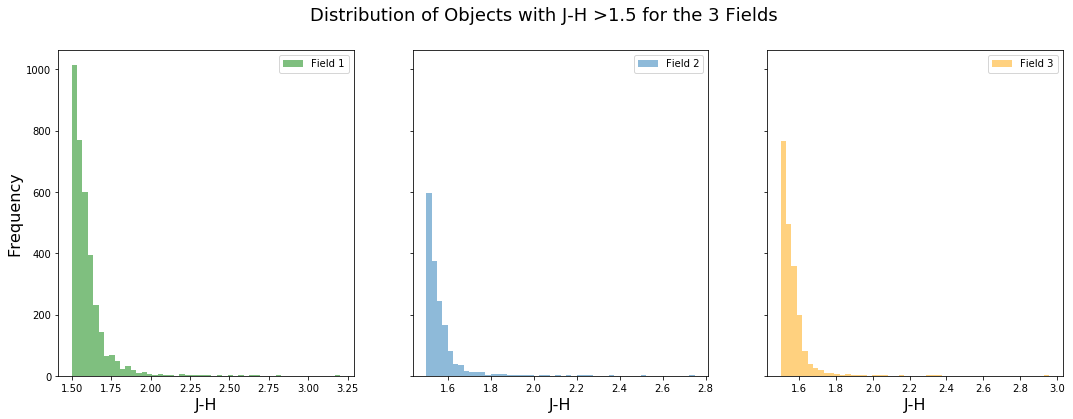

In [10]:
command=''' SELECT OiJ.StarID, OiJ.Mag1 -OiH.Mag1 as "J-H",OiJ.FieldID
            From  Object_info as OiJ
                Join Object_info as OiH 
                    on (OiJ.starID = OiH.starID)
            Where (OiJ.Filter='J') AND (OiH.Filter ='H') AND (OiJ.Mag1 - OiH.Mag1  > 1.5)
        '''


t = pd.read_sql(command,con1)
#Still need to make a histogram not sure if to do an overall distribution or a distribution per field.
Field1, = np.where(t['FieldID']=='1')
Field2, = np.where(t['FieldID']=='2')
Field3, = np.where(t['FieldID']=='3')

JH1 = t['J-H'][Field1]
JH2 = t['J-H'][Field2]
JH3 = t['J-H'][Field3]
nbins =50
fig,ax = plt.subplots(1,3,sharey=True,figsize=(18,6))
ax[0].hist(JH1,alpha=0.5,label='Field 1',color='Green',bins=nbins)
ax[0].legend(loc='best')
ax[0].set_ylabel('Frequency',size=16)
ax[0].set_xlabel('J-H',size=16)
ax[1].hist(JH2,alpha=0.5,label='Field 2',bins=nbins)
ax[1].legend(loc='best')
ax[1].set_xlabel('J-H',size=16)
ax[2].hist(JH3,alpha=0.5,label='Field 3',color='Orange',bins=nbins)
ax[2].legend(loc='best')
ax[2].set_xlabel('J-H',size=16)
plt.suptitle('Distribution of Objects with J-H >1.5 for the 3 Fields',size=18)
plt.savefig('J-H_distributions.png')
plt.show()

#### R3: Find the objects where Ks differs by more than 20 times the flux uncertainty from the mean flux. 

In [11]:
# R3: This is a big one as I required a for loop to take into account the fields that I was going to use and union all
# the stars. This is again a command that I relied heavily on python for to format the command in such a way that it would
# be robust enough to solve for any number of epochs for any number of given fields.

# comments on the results, this prints out the number of objects for a given field for which the flux - the average
# at each epoch differs by 20 * the uncertainty of the object at that epoch. if the case None is returned it means that 
# there was only one epoch in that field so no variablity could be measured.

command1 =''' 
            Select Distinct it.FieldID 
            From info_table as it
            WHERE (it.Filter = 'Ks')
            
'''

field_tab = pd.read_sql(command1,con1)

F_commands=[]
for field in field_tab['FieldID']:

    command1 =''' 
                Select it.MJD 
                From info_table as it
                WHERE (it.FieldID ={}) AND  (it.Filter = 'Ks')

    '''.format(str(field))

    epoch_tab = pd.read_sql(command1,con1)

    # selects the stars and fluxes
    cases = []
    for i in range(len(epoch_tab)):
        com = '''(SELECT Flux1, dFlux1 ,Filter, StarID FROM Object_info as oi WHERE (oi.Filter ='Ks') AND (oi.MJD = {}) AND (oi.FieldID = {}))'''.format(epoch_tab['MJD'][i],field)
        cases.append(com)

    # matches the stars bases on thier ID and to make a table of their fluxes of the star at each epoch.
    command='SELECT t1.StarID,t1.Filter,t1.Flux1 as Flux1'
    for i in range(len(cases)-1):
        command = command +',t{0}.flux1 as Flux{0}'.format(i+2)

    if len(cases)> 1:
        command = command+' FROM {} as t1'
        for i in range(len(cases)-1):
            command = command+' JOIN {1} as t{0} on (t1.StarID = t{0}.StarID)'.format(i+2,'{}')
    else:
        command = command+' From {} as t1'

    command = '('+command+')'
    command = command.format(*cases)

    #to_avg_tab = pd.read_sql(command,con1) # to run this command the '(' and ')' need to be taken out of command and the 
                                            # start and end


    #This command is done so that a robust average flux is calculated for each star for all epochs in the field
    com2 ='(t1.Flux1'
    for i in range(len(cases)-1):
        com2 = com2+' + t1.Flux{}'.format(i+2)
    com2 = com2+')/{}.0'.format(len(cases))

    avg_tab = 'SELECT t1.StarID as StarID,t1.Filter as Filter, {} as avg_flux From {} as t1'.format(com2,command)
    avg_tab = '('+avg_tab+')'
    #avg_table = pd.read_sql(avg_tab,con1)

    per_epoch_commands =[]
    for i in range(len(epoch_tab)):
        com = '''(SELECT  oi.FieldID,oi.StarID,ABS(oi.Flux1 - avg_tab.avg_flux) as value, 20*oi.dFlux1 as condition 
        FROM Object_info as oi
            JOIN {} as avg_tab
                ON (oi.StarID = avg_tab.starID)
        WHERE (oi.Filter ='Ks') AND (oi.MJD = {}) AND (oi.FieldID = {}) AND (value > condition))'''.format(avg_tab,epoch_tab['MJD'][i],field)
        per_epoch_commands.append(com)

    #test = per_epoch_commands[2]
    #epoch1_table = pd.read_sql(test,con1)

    # Making the final command
    F_command = ''' SELECT ep1.FieldID as Field, COUNT(ep1.StarID) as Number FROM {} as ep1'''#.format(str(field),'{}')
    for i in range(len(per_epoch_commands)-1):
        F_command = F_command+' JOIN {} AS ep{} ON (ep1.StarID = ep{}.StarID)'.format({},i+2,i+2)
    F_command = '('+F_command+')'
    F_command = F_command.format(*per_epoch_commands)
    F_commands.append(F_command)

# Merge all tables 
tab_merge ='Select Field, Number from {}'
for i in range(len(field_tab)-1):
    tab_merge = tab_merge+' UNION SELECT Field, Number from {}'
tab_merge = tab_merge.format(*F_commands)
table_merged = pd.read_sql(tab_merge,con1)
table_merged


,Field,Number
0,None,0
1,1,2419
2,3,435


**Comments on Graph:** The Graph shows the number of objects for a given Field which differ by 20*dFlux* from the over-all mean, i.e mean of the 6 Ks filters. Unique StarIDs were counted such that if in a field there was more than one epoch for the Ks filter, the star was only counted once even if it met the condition on more than one occassion, hence why count values are so high in field 1, as there are 3 opertunities to pass the condition.

#### R4: Find all catalogues that exist for a given field.

In [12]:
field = input('Enter a Field ID (1-3): ')
print('The catalogues that exist in Field {} are: '.format(str(field)))
command=''' SELECT it.Filename as File_Name, it.Filter,it.FieldID
            FROM info_table as it
            WHERE (it.FieldID = {})
            GROUP BY File_Name
        '''.format(str(field))
t = pd.read_sql(command,con1)
t

Enter a Field ID (1-3): 1
The catalogues that exist in Field 1 are: 


,File_Name,Filter,FieldID
0,H-ADP.2017-01-18T11:58:35.780.fits,H,1
1,J-ADP.2017-01-18T11:58:35.781.fits,J,1
2,Ks-ADP.2016-05-25T15:33:39.546.fits,Ks,1
3,Ks-ADP.2016-05-25T15:33:43.377.fits,Ks,1
4,Ks-ADP.2017-01-18T11:58:39.907.fits,Ks,1
5,Y-ADP.2017-01-18T11:58:36.901.fits,Y,1
6,Z-ADP.2017-01-18T11:58:36.905.fits,Z,1


#### R5: For a given  field I would like to retrieve the Y, Z, J, H and Ks magnitudes for all stars with S/N > 30 in Y, Z, J, H and Ks.

Enter a Field ID (1-3): 1


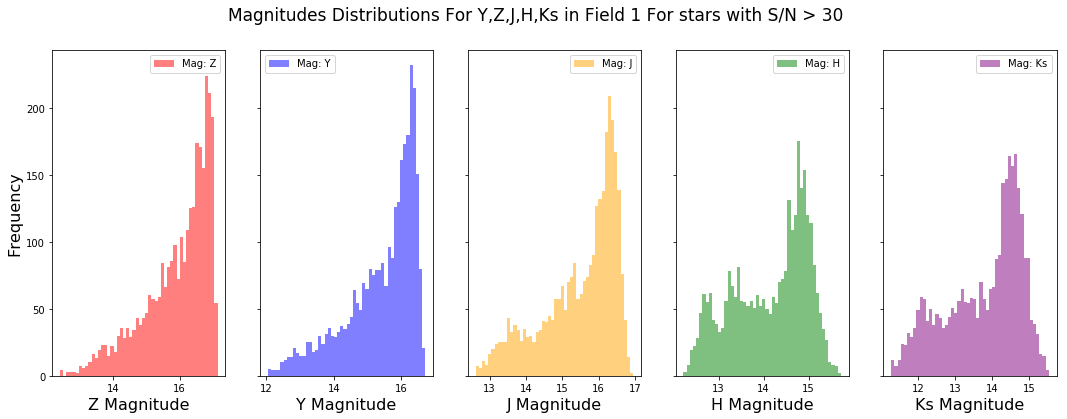

Number of stars in Field 1 above SNR of 30: 3008


In [13]:
ffield = input('Enter a Field ID (1-3): ')

# needed two SQL command to run this operation here I take the average value of Ks and SNR values depending on the field
# as want all objects that are in the field above the SNR of 30. Needed python to make the correct sql command, however 
# the command is robust for multiple MJD entries in the Ks filter, assuming that there are only 1 entry per Y,J,H and Z 
# Filter per Field. This is down to how I constructed my database and table.

command1 =''' 
            Select it.MJD 
            From info_table as it
            WHERE (it.FieldID ={}) AND  (it.Filter = 'Ks')
            
'''.format(str(field))
t = pd.read_sql(command1,con1)

cases = []
for i in range(len(t)):
    com = '''(SELECT Flux1/dFlux1 as SNR,Filter, Mag1, StarID,class FROM Object_info as oi WHERE (oi.Filter ='Ks') AND (oi.MJD = {}) AND (oi.FieldID = {}))'''.format(str(t['MJD'][i]),str(field))
    cases.append(com)
    
command='(SELECT t1.StarID, t1.Mag1 as Mag1,t1.Filter,t1.SNR as SNR1, t1.class'
for i in range(len(cases)-1):
    command = command +', t{0}.Mag1 as Mag{0},t{0}.SNR as SNR{0}'.format(i+2)

if len(cases)> 1:
    command = command+' FROM {} as t1'
    for i in range(len(cases)-1):
        command = command+' JOIN {1} as t{0} on (t1.StarID = t{0}.StarID)'.format(i+2,'{}')
else:
    command = command+' From {} as t1'

command = command+')'
command = command.format(*cases)

com1 ='(t1.SNR1'
for i in range(len(cases)-1):
    com1 = com1+' + t1.SNR{}'.format(i+2)
com1 = com1+')/{}.0'.format(len(cases))

com2 ='(t1.Mag1'
for i in range(len(cases)-1):
    com2 = com2+' + t1.Mag{}'.format(i+2)
com2 = com2+')/{}.0'.format(len(cases))


command2 = '(SELECT t1.StarID as StarID,t1.Filter as Filter,t1.class as Class, {} as avg_k,{} as SNR_avg From {} as t1)'.format(com2,com1,command)

command=''' Select y_Oi.StarID as StarID, y_Oi.Mag1 as Y_Mag, z_Oi.Mag1 as Z_Mag, j_Oi.Mag1 as J_Mag,
            h_Oi.Mag1 as H_Mag, Ks_Oi.avg_k as Ks_Mag
            
            FROM Object_info as y_Oi
                Join Object_info as z_Oi 
                    on (y_Oi.starID = z_Oi.starID)
                Join Object_info as j_Oi 
                    on (z_Oi.starID = j_Oi.starID)
                Join Object_info as h_Oi 
                    on (j_Oi.starID = h_Oi.starID)
                Join {0} as Ks_Oi 
                    on (h_Oi.starID = Ks_Oi.starID)
                    
            WHERE (y_oi.Flux1/y_oi.dFlux1 > 30) AND (z_oi.Flux1/z_oi.dFlux1 > 30) AND (j_oi.Flux1/j_oi.dFlux1 > 30)
            AND (h_oi.Flux1/h_oi.dFlux1 > 30) AND (Ks_oi.SNR_avg > 30) AND (y_Oi.Filter='Y') AND
            (z_Oi.Filter='Z') AND (j_Oi.Filter='J') AND (h_Oi.Filter='H') AND (Ks_Oi.Filter='Ks')  
            AND (y_oi.FieldID={1}) AND (y_oi.class=-1) AND (j_oi.class=-1) AND (h_oi.class=-1) AND (z_oi.class=-1)
            AND (Ks_oi.class=-1) 
        '''.format(command2,str(field))

t = pd.read_sql(command,con1)
Y_Mag = t['Y_Mag']
Z_Mag = t['Z_Mag']
J_Mag = t['J_Mag']
H_Mag = t['H_Mag']
Ks_Mag = t['Ks_Mag']
Mags = [Z_Mag,Y_Mag,J_Mag,H_Mag,Ks_Mag]
MagNames = ['Z','Y','J','H','Ks']
nbins = 50
colors = ['Red','Blue','Orange','Green','Purple']
# Could do seperate plots of histograms for each Magnitude or do a single one with faded colours (for overlap) showing 
# the distributions. Titled as stars for field X
fig,ax = plt.subplots(1,5,sharey=True,figsize=(18,6))
for i in range(5):
    ax[i].hist(Mags[i],bins=nbins,label='Mag: {}'.format(MagNames[i]),alpha=0.5,color=colors[i])
    ax[i].legend(loc='best')
    ax[i].set_xlabel(MagNames[i]+' Magnitude',size=16)
ax[0].set_ylabel('Frequency',size=16)
plt.suptitle('Magnitudes Distributions For Y,Z,J,H,Ks in Field {} For stars with S/N > 30 '.format(str(field)),size=17)
plt.savefig('R5_field1.png')
plt.show()
print ('Number of stars in Field {} above SNR of 30: {}'.format(str(field),str(len(Y_Mag))))

### c) The Euclid space mission will have three filters: Y, J, and H. For planning purposes a colleague asks you to use your database to create simulated stars for Euclid. Use the distribution of your sample of star in Y-J, J-H space to create a new sample of 100,000 stars for him to use as simulation sample for Euclid. Make sure to carefully justify the choices you make. Display the result as a 2D distribution function in the Y-J, J-H plane

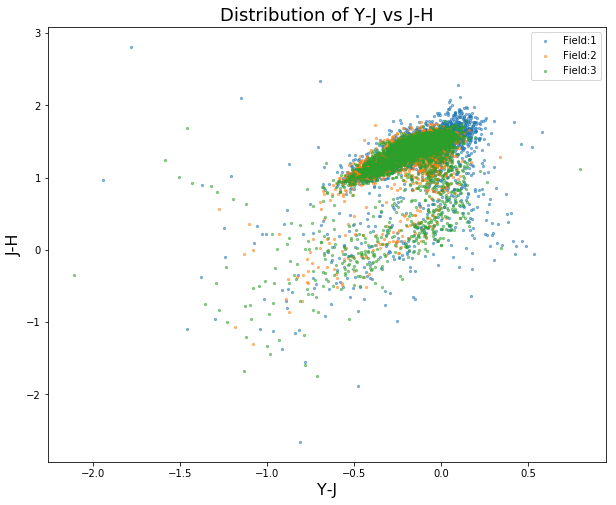

In [14]:
command = '''
            SELECT oi_J.StarID as ID, oi_Y.Mag1 - oi_J.Mag1 as 'Y-J', oi_J.Mag1 -oi_H.Mag1 as "J-H",oi_J.FieldID as Field
            FROM  Object_info as oi_J
                JOIN Object_info as oi_H 
                    ON (oi_J.starID = oi_H.starID)
                JOIN Object_info as oi_Y
                    ON (oi_J.starID = oi_Y.starID)
            WHERE (oi_J.Filter='J') AND (oi_Y.Filter='Y') AND (oi_H.Filter = 'H') 
            AND (oi_J.class=-1)AND (oi_Y.class=-1)AND (oi_H.class=-1)
        '''
t = pd.read_sql(command,con1)

plt.figure(figsize=(10,8))
for i in range(3):
    mask, = np.where(t['Field'] == str(i+1))
    YJ = t['Y-J'][mask]
    JH = t['J-H'][mask]
    plt.scatter(YJ,JH,s=5,alpha = 0.5,label='Field:{}'.format(i+1))
plt.xlabel('Y-J',size=16)
plt.ylabel('J-H',size=16)
plt.legend(loc='best')
plt.title('Distribution of Y-J vs J-H',size=18)
plt.savefig('Original_distribution.png')
plt.show()
plt.close()

In [15]:
# Going to use a Gaussian Mixture model to describe the 2-D distribution as is easy to implement. But first need the 
# data in the correct structure.
YJ = t['Y-J']
JH = t['J-H']

x = np.vstack([YJ,JH]).T
print(x.shape)
data = x
print(data.shape)
delete_vals, axis = np.where(np.isnan(x))
data = np.delete(data,delete_vals,axis=0)
print(data.shape)

(18429, 2)
(18429, 2)
(18428, 2)


In [16]:
# This was adopted from the lecture notes (lecture 3 - found on the blackboard page)

from sklearn.mixture import GaussianMixture

#fit model to 1- 20 components to see which gives the best results
N = range(1,21)
models = [None for i in N]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(data)
    
AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]

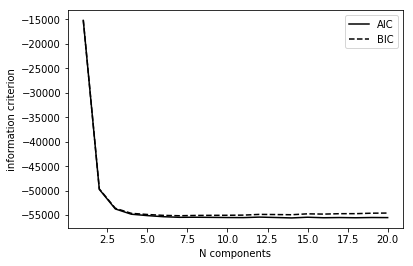

In [17]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')
plt.xlabel('N components')
plt.ylabel('information criterion')
plt.legend(loc='best')
plt.savefig('AIC_vs_BIC.png')
plt.show()

In [18]:
print( "The minimum number of components according to AIC is {0}".format(N[np.argmin(AIC)]))
print("The minimum number of components according to BIC is {0}".format(N[np.argmin(BIC)]))

The minimum number of components according to AIC is 14
The minimum number of components according to BIC is 7


In [19]:
M_best_AIC = models[np.argmin(AIC)]
M_best_BIC = models[np.argmin(BIC)]
average_AIC_BIC = int(round(np.mean([np.argmin(AIC),np.argmin(BIC)])))
print(average_AIC_BIC)
M_best = models[average_AIC_BIC]

10


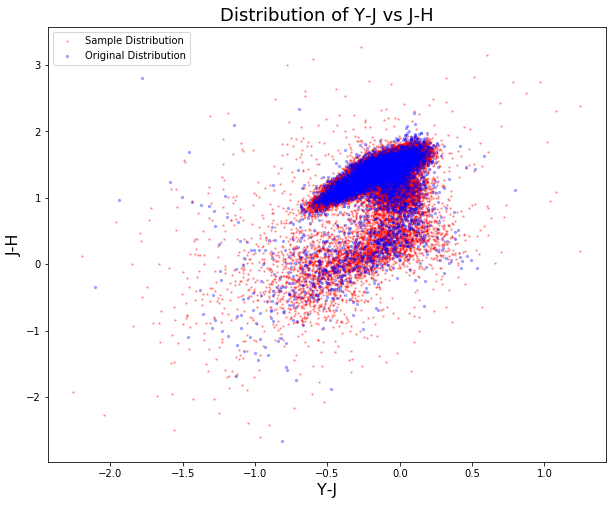

In [20]:
Samples100000 = M_best.sample(100000)[:][0]
plt.figure(figsize=(10,8))
plt.scatter(Samples100000[:,0],Samples100000[:,1],c='red',s=2,alpha=0.3,label='Sample Distribution')
plt.scatter(YJ,JH,c='blue',s=5,alpha = 0.3,label='Original Distribution')
plt.xlabel('Y-J',size=16)
plt.ylabel('J-H',size=16)
plt.legend(loc='best')
plt.title('Distribution of Y-J vs J-H',size=18)
plt.savefig('Sample_distribution_BIC.png')
plt.show()
plt.close()

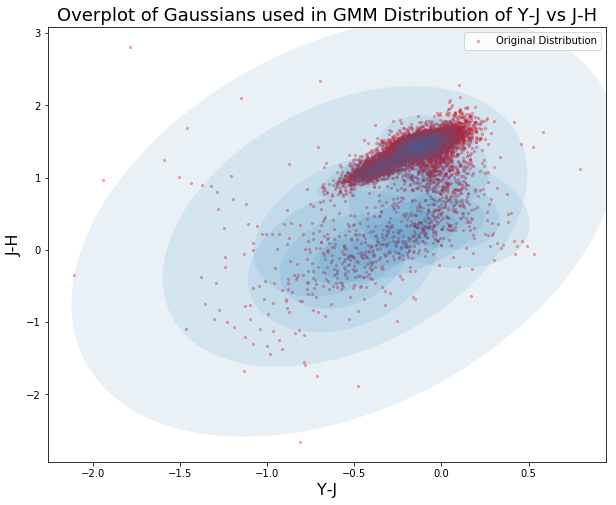

In [21]:
# this bit of code was adapted from the following website:
# https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Covariance-Type


from matplotlib.patches import Ellipse

def draw_ellipse(positions, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # convert covariance to principle axis
    if covariance.shape == (2,2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width , height = 2 *np.sqrt(s)
    else:
        angle=0
        width,height = 2* np.sqrt(covariance)
    # Draw Ellipse
    for nsig in range(1,4):
        ax.add_patch(Ellipse(positions,nsig*width,nsig*height,angle,**kwargs))      


plt.figure(figsize=(10,8))
plt.scatter(YJ,JH,c='red',s=5,alpha = 0.3,label='Original Distribution')

w_factor = 0.025/ M_best.weights_.max()
for pos, covar, w in zip(M_best.means_,M_best.covariances_,M_best.weights_):
    draw_ellipse(pos,covar,alpha=w_factor)

plt.xlabel('Y-J',size=16)
plt.ylabel('J-H',size=16)
plt.legend(loc='best')
plt.title('Overplot of Gaussians used in GMM Distribution of Y-J vs J-H',size=18)
plt.savefig('Gaussian_overplot.png')
plt.show()
plt.close()